# Koch Snowflake

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
def koch_line(start, end, factor):
    """
    Segments a line to Koch line, creating fractals.
    
    
    :param tuple start:  (x, y) coordinates of the starting point
    :param tuple end: (x, y) coordinates of the end point
    :param float factor: the multiple of sixty degrees to rotate
    :returns tuple: tuple of all points of segmentation
    """
    
    # coordinates of the start
    x1, y1 = start[0], start[1]
    
    # coordinates of the end
    x2, y2 = end[0], end[1]
    
    # the length of the line
    l = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    
    # first point: same as the start 
    a = (x1, y1)
    
    # second point: one third in each direction from the first point
    b = (x1 + (x2 - x1)/3., y1 + (y2 - y1)/3.)
    
    # third point: rotation for multiple of 60 degrees
    c = (b[0] + l/3. * np.cos(factor * np.pi/3.), b[1] + l/3. * np.sin(factor * np.pi/3.))
    
    # fourth point: two thirds in each direction from the first point
    d = (x1 + 2. * (x2 - x1)/3., y1 + 2. * (y2 - y1)/3.)
    
    # the last point
    e = end
    
    return {'a': a, 'b': b, 'c': c, 'd' : d, 'e' : e, 'factor' : factor}

In [3]:
def koch_snowflake(degree, s=5.0):
    """Generates all lines for a Koch Snowflake with a given degree.
    
    :param int degree: how deep to go in the branching process
    :param float s: the length of the initial equilateral triangle
    :returns list: list of all lines that form the snowflake
    """
    # all lines of the snowflake
    lines = []
    
    # we rotate in multiples of 60 degrees
    sixty_degrees = np.pi / 3.
    
    # vertices of the initial equilateral triangle
    A = (0., 0.)
    B = (s, 0.)
    C = (s * np.cos(sixty_degrees), s * np.sin(sixty_degrees))
    
    # set the initial lines
    if degree == 0:
        lines.append(koch_line(A, B, 0))
        lines.append(koch_line(B, C, 2))
        lines.append(koch_line(C, A, 4))
    else:
        lines.append(koch_line(A, B, 5))
        lines.append(koch_line(B, C, 1))
        lines.append(koch_line(C, A, 3))
    
    for i in range(1, degree):
        # every lines produce 4 more lines
        for _ in range(3*4**(i - 1)):
            line = lines.pop(0)
            factor = line['factor']

            lines.append(koch_line(line['a'], line['b'], factor % 6))  # a to b
            lines.append(koch_line(line['b'], line['c'], (factor - 1) % 6))  # b to c
            lines.append(koch_line(line['c'], line['d'], (factor + 1) % 6))  # d to c
            lines.append(koch_line(line['d'], line['e'], factor % 6))  # d to e

    return lines

## Draw Snowflakes

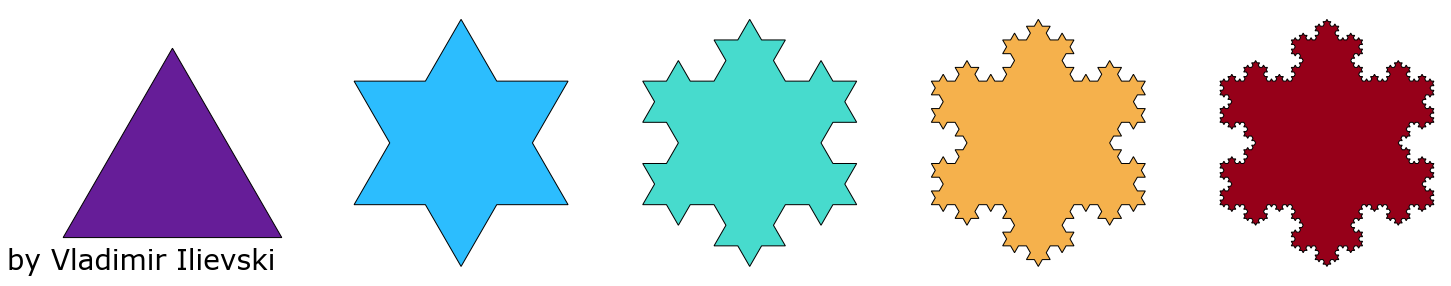

In [4]:
fig, axs = plt.subplots(1, 5, figsize=(25, 5), subplot_kw={'aspect': 'equal'})
colors = ['#661D98', '#2CBDFE', '#47DBCD', '#F5B14C', '#960019']

max_degree = 5
for d in range(max_degree):
    lines = koch_snowflake(degree=d)
    
    # extract the line coordinates
    x, y = [], []
    for l in lines:
        x.extend([l['a'][0], l['b'][0], l['c'][0], l['d'][0], l['e'][0]])
        y.extend([l['a'][1], l['b'][1], l['c'][1], l['d'][1], l['e'][1]])
    
    # remove all ticks and axes
    axs[d].set_xticks([], [])
    axs[d].set_yticks([], [])
    axs[d].spines['right'].set_visible(False)
    axs[d].spines['left'].set_visible(False)
    axs[d].spines['top'].set_visible(False)
    axs[d].spines['bottom'].set_visible(False)
    
    # fill the polygons
    axs[d].fill(x, y, facecolor=colors[d], edgecolor='black', lw=1)

plt.gcf().text(0.1, 0.15, 'by Vladimir Ilievski', fontsize=28, fontfamily='Verdana')
plt.savefig('snowflakes_0_to_4.png', dpi=300, bbox_inches='tight')

## Make an animation

In [5]:
def line_function(a, b, num_points):
    """Determining the function of the line that passes through the points a, b
    with coordinates (x1, y1) and (x2, y2) respectively. The equation is
    y = m*x + b where m = (y2 - y1)/(x2 - x1). Then, b = y2 - m*x2 = y1 - m*x1.
    
    :param tuple a: (x, y) coordinates of the first point
    :param tuple b: (x, y) coordinates of the second point
    :param int num_points: number of points to generate
    :returns tuple: x and f(x) values of the function
    """
    x1, y1 = a[0], a[1]
    x2, y2 = b[0], b[1]
    
    m = 1.0*(y2 - y1)/(x2 - x1)
    b = y2 - m*x2
    
    x = np.linspace(x1, x2, num_points)
    y = m*x + b
    
    return list(x), list(y)

In [6]:
# how much to branch
degree = 5

# number of segments
num_init_lines = 3

# keep the lines to draw in levels related to their degree
lines_draw = {d: {s: {'x': [], 'y': []} for s in range(num_init_lines)} for d in range(degree)}

# angles of the initial equilateral triangle
sixty_degrees = np.pi / 3.

# side length of the initial equilateral triangle
s = 5.

# vertices of the initial three lines of the triangle
A = (0., 0.)
B = (5, 0.)
C = (s * np.cos(sixty_degrees), s * np.sin(sixty_degrees))

# add initial lines
init_line1 = line_function(A, B, 4**degree)
lines_draw[0][0]['x'].extend(init_line1[0])
lines_draw[0][0]['y'].extend(init_line1[1])

init_line2 = line_function(B, C, 4**degree)
lines_draw[0][1]['x'].extend(init_line2[0])
lines_draw[0][1]['y'].extend(init_line2[1])

init_line3 = line_function(C, A, 4**degree)
lines_draw[0][2]['x'].extend(init_line3[0])
lines_draw[0][2]['y'].extend(init_line3[1])

for i in range(1, degree):
    # generate koch lines for the current degree
    koch_lines = koch_snowflake(i)
    # how many lines per segment
    num_lines_segment = len(koch_lines) // num_init_lines
    for j in range(num_init_lines):
        for k in range(num_lines_segment):
            line = koch_lines[j * num_lines_segment + k]
        
            # generate functions for the lines
            l1 = line_function(line['a'], line['b'], 4**(degree - i))
            l2 = line_function(line['b'], line['c'], 4**(degree - i))
            l3 = line_function(line['c'], line['d'], 4**(degree - i))
            l4 = line_function(line['d'], line['e'], 4**(degree - i))

            # level, segment, coordinate
            lines_draw[i][j]['x'].extend(l1[0])
            lines_draw[i][j]['y'].extend(l1[1])

            lines_draw[i][j]['x'].extend(l2[0])
            lines_draw[i][j]['y'].extend(l2[1])

            lines_draw[i][j]['x'].extend(l3[0])
            lines_draw[i][j]['y'].extend(l3[1])

            lines_draw[i][j]['x'].extend(l4[0])
            lines_draw[i][j]['y'].extend(l4[1])

In [7]:
# determine the min and max to set the limits in the animation
min_x, max_x = float('inf'), float('-inf')
min_y, max_y = float('inf'), float('-inf')
for i in range(degree):
    for j in range(num_init_lines):
        min_x = min(min_x, np.min(lines_draw[i][j]['x']))
        max_x = max(max_x, np.max(lines_draw[i][j]['x']))
        
        min_y = min(min_y, np.min(lines_draw[i][j]['y']))
        max_y = max(max_y, np.max(lines_draw[i][j]['y']))

In [ ]:
# how many animation frames per level
frames_per_level = 32
# how many points will be drawn each frame
points_per_frame = 1024 // frames_per_level
total_frames = degree * frames_per_level

# color for each level
colors = ['#661D98', '#2CBDFE', '#47DBCD', '#F5B14C', '#960019']

fig = plt.figure(figsize=(10, 10))

# formatting options
ax = plt.axes(xlim=(round(min_x) - 0.5, round(max_x) + 0.5), ylim=(round(min_y) - 0.5, round(max_y) + 0.5))
ax.set_xticks([], [])
ax.set_yticks([], [])
text = ax.text(round(min_x) - 0.2, round(min_y) - 0.2, 'by Vladimir Ilievski', fontsize=18, fontfamily='Verdana')

# initialize the three line segments
line1, = ax.plot([], [], color=colors[0], alpha=1., lw=2)
line2, = ax.plot([], [], color=colors[0], alpha=1., lw=2)
line3, = ax.plot([], [], color=colors[0], alpha=1., lw=2)

# initialze the leadinng points
point1, = ax.plot([], [], color=colors[0], marker='o', ms=5)
point2, = ax.plot([], [], color=colors[0], marker='o', ms=5)
point3, = ax.plot([], [], color=colors[0], marker='o', ms=5)

def animate(i):
    global frames_per_level
    global points_per_frame
    global total_frames
    
    if i >= 160:
        return line1, line2, line3, point1, point2, point3,
    
    # determine the current level
    level = i // 32
    
    # level change
    if i % 32 == 0:
        # empty the data in the line segments
        line1.set_data([], [])
        line2.set_data([], [])
        line3.set_data([], [])
        
        # change the color of the lines
        line1.set_color(colors[level])
        line2.set_color(colors[level])
        line3.set_color(colors[level])
        
        # empty the data in the leading points
        point1.set_data([], [])
        point2.set_data([], [])
        point3.set_data([], [])
        
        # change color of the leading points
        point1.set_color(colors[level])
        point2.set_color(colors[level])
        point3.set_color(colors[level])
    
    # set data
    line1.set_data(lines_draw[level][0]['x'][:((i % 32 + 1)*32)], lines_draw[level][0]['y'][:((i % 32 + 1)*32)])
    line2.set_data(lines_draw[level][1]['x'][:((i % 32 + 1)*32)], lines_draw[level][1]['y'][:((i % 32 + 1)*32)])
    line3.set_data(lines_draw[level][2]['x'][:((i % 32 + 1)*32)], lines_draw[level][2]['y'][:((i % 32 + 1)*32)])
    
    # set data
    point1.set_data(lines_draw[level][0]['x'][((i % 32 + 1)*32) - 1], lines_draw[level][0]['y'][((i % 32 + 1)*32) - 1])
    point2.set_data(lines_draw[level][1]['x'][((i % 32 + 1)*32) - 1], lines_draw[level][1]['y'][((i % 32 + 1)*32) - 1])
    point3.set_data(lines_draw[level][2]['x'][((i % 32 + 1)*32) - 1], lines_draw[level][2]['y'][((i % 32 + 1)*32) - 1])
    
    return line1, line2, line3, point1, point2, point3,

# call the animator	 
anim = animation.FuncAnimation(fig, animate, frames=total_frames + 64, interval=80, blit=True)
# save the animation as mp4 video file 
anim.save('snowflake.gif',writer='imagemagick') 